In [1]:
#import libraries needed for the project
import numpy as np   #linear algebra
import pandas as pd  #data processing
import seaborn as sns  #data visualisation
import matplotlib.pyplot as plt  #data visualisation
%matplotlib inline  

In [2]:
#Create data sets by loading the data 

In [3]:
house_data = pd.read_csv('train.csv')

In [4]:
final_test_data= pd.read_csv('test.csv')

In [5]:
#Split the house data by loading the train_test_split and random libraries
from sklearn.model_selection import train_test_split
import random

In [6]:
X=house_data.iloc[:,0:80]

In [7]:
y=house_data.iloc[:,[0,80]]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)

In [9]:
train_data=pd.merge(X_train, y_train, left_on='Id', right_on='Id')

In [10]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1383,70,RM,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,157000
1,673,20,RL,NaN,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,165000
2,1039,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,97000
3,84,20,RL,80.0,8892,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,COD,Normal,126500
4,542,60,RL,NaN,11000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,248000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,1084,20,RL,80.0,8800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,3,2006,WD,Normal,160000
1164,1341,20,RL,70.0,8294,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,6,2007,WD,Normal,123000
1165,1139,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,196000
1166,215,60,RL,NaN,10900,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,450,3,2010,WD,Normal,161750


In [11]:
test_data=pd.merge(X_test, y_test, left_on='Id', right_on='Id')

In [12]:
#Explore the Sale Price variable for both train and test data sets  

Text(0, 0.5, 'Number of observations')

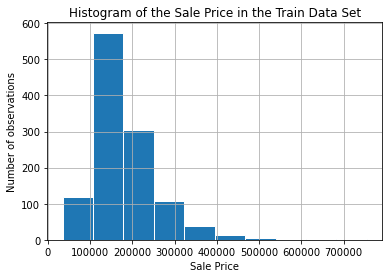

In [13]:
train_data.hist('SalePrice', ec='w')
plt.title('Histogram of the Sale Price in the Train Data Set')
plt.xlabel('Sale Price')
plt.ylabel('Number of observations')

Text(0, 0.5, 'Number of observations')

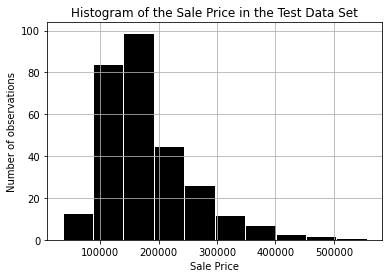

In [14]:
test_data.hist('SalePrice', ec='w', color='black')
plt.title('Histogram of the Sale Price in the Test Data Set')
plt.xlabel('Sale Price')
plt.ylabel('Number of observations')

Text(0, 0.5, 'Sale Price')

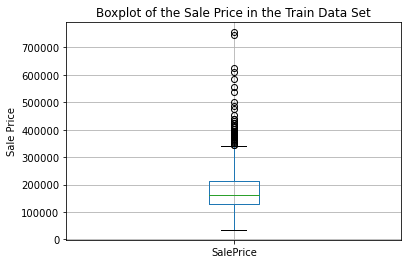

In [15]:
train_data.boxplot('SalePrice')
plt.title('Boxplot of the Sale Price in the Train Data Set')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

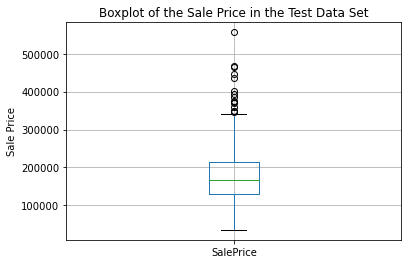

In [16]:
test_data.boxplot('SalePrice')
plt.title('Boxplot of the Sale Price in the Test Data Set')
plt.ylabel('Sale Price')

In [17]:
train_data['SalePrice'].describe()

count      1168.000000
mean     180595.621575
std       79566.738252
min       34900.000000
25%      130000.000000
50%      162900.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [18]:
test_data['SalePrice']. describe()

count       292.000000
mean     182223.493151
std       79066.109880
min       35311.000000
25%      129000.000000
50%      167000.000000
75%      214125.000000
max      556581.000000
Name: SalePrice, dtype: float64

In [19]:
#Calculate the percentage of missing values in each data set

In [20]:
missing_train=train_data.isnull().sum().sort_values(ascending=False)
percent_train=(train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
mv_train=pd.concat([missing_train, percent_train], axis=1, keys=['Missing Values', 'Percentage'])
mv_train.head(20)

,Missing Values,Percentage
PoolQC,1162,0.994863
MiscFeature,1124,0.962329
Alley,1095,0.937500
Fence,941,0.805651
FireplaceQu,558,0.477740
LotFrontage,207,0.177226
GarageYrBlt,68,0.058219
GarageCond,68,0.058219
GarageType,68,0.058219
GarageFinish,68,0.058219


In [21]:
missing_test=test_data.isnull().sum().sort_values(ascending=False)
percent_test=(test_data.isnull().sum()/test_data.isnull().count()).sort_values(ascending=False)
mv_test=pd.concat([missing_test, percent_test], axis=1, keys=['Missing Values', 'Percentage'])
mv_test.head(20)

,Missing Values,Percentage
PoolQC,291,0.996575
MiscFeature,282,0.965753
Alley,274,0.938356
Fence,238,0.815068
FireplaceQu,132,0.452055
LotFrontage,52,0.178082
GarageYrBlt,13,0.044521
GarageFinish,13,0.044521
GarageType,13,0.044521
GarageQual,13,0.044521


In [22]:
missing_final_test=final_test_data.isnull().sum().sort_values(ascending=False)
percent_final_test=(final_test_data.isnull().sum()/final_test_data.isnull().count()).sort_values(ascending=False)
mv_final_test=pd.concat([missing_final_test, percent_final_test], axis=1, keys=['Missing Values', 'Percentage'])
mv_final_test.head(20)

,Missing Values,Percentage
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
GarageQual,78,0.053461
GarageFinish,78,0.053461
GarageCond,78,0.053461


In [23]:
#Clean the data sets
#Data description text file supplied with data sets indicates categorical variables with N/A mean none/no

In [24]:
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond'):
    train_data[col] = train_data[col].fillna('None')

In [25]:
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond'):
    test_data[col] = test_data[col].fillna('None')

In [26]:
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond'):
    final_test_data[col] = final_test_data[col].fillna('None')

In [27]:
#All other columns will have to be investigated with numerical being imputed with either the median or mean. 

In [28]:
#Variable 1 - LotFrontage

array([[<AxesSubplot:title={'center':'LotFrontage'}>]], dtype=object)

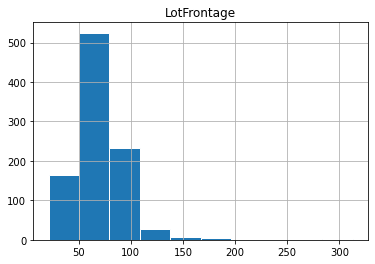

In [29]:
train_data.hist('LotFrontage', ec='w')

<AxesSubplot:>

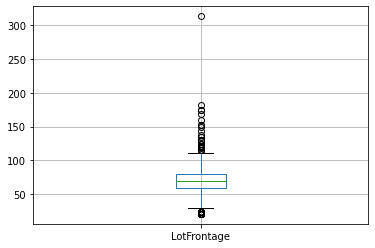

In [30]:
train_data.boxplot('LotFrontage')

In [31]:
train_data["LotFrontage"].mean(), train_data["LotFrontage"].median()

(69.4401664932362, 69.0)

array([[<AxesSubplot:title={'center':'LotFrontage'}>]], dtype=object)

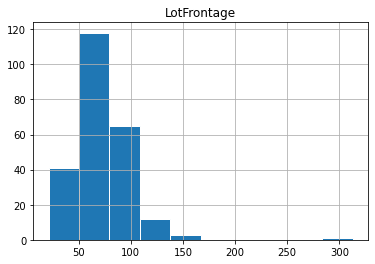

In [32]:
test_data.hist('LotFrontage', ec='w')

<AxesSubplot:>

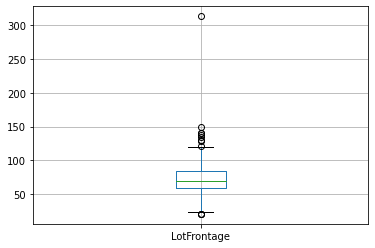

In [33]:
test_data.boxplot('LotFrontage')

In [34]:
test_data["LotFrontage"].mean(), test_data["LotFrontage"].median()

(72.49166666666666, 70.0)

In [35]:
#Replace values with the median because of the outliers shown inthe box plot
#The median will provide a better estimate for the middle value in the data set which I wish to use

In [36]:
train_data["LotFrontage"]=train_data["LotFrontage"].fillna(train_data["LotFrontage"].median())

In [37]:
test_data["LotFrontage"]=test_data["LotFrontage"].fillna(test_data["LotFrontage"].median())

In [38]:
final_test_data["LotFrontage"]=final_test_data["LotFrontage"].fillna(final_test_data["LotFrontage"].median())

In [39]:
#Variable 2 - GarageYrBlt

In [40]:
train_data['GarageYrBlt'].describe(), test_data['GarageYrBlt'].describe(), final_test_data['GarageYrBlt'].describe()

(count    1100.000000
 mean     1978.809091
 std        24.896947
 min      1900.000000
 25%      1961.750000
 50%      1980.000000
 75%      2002.000000
 max      2010.000000
 Name: GarageYrBlt, dtype: float64,
 count     279.000000
 mean     1977.311828
 std        23.861250
 min      1910.000000
 25%      1961.000000
 50%      1978.000000
 75%      2000.000000
 max      2010.000000
 Name: GarageYrBlt, dtype: float64,
 count    1381.000000
 mean     1977.721217
 std        26.431175
 min      1895.000000
 25%      1959.000000
 50%      1979.000000
 75%      2002.000000
 max      2207.000000
 Name: GarageYrBlt, dtype: float64)

array([[<AxesSubplot:title={'center':'GarageYrBlt'}>]], dtype=object)

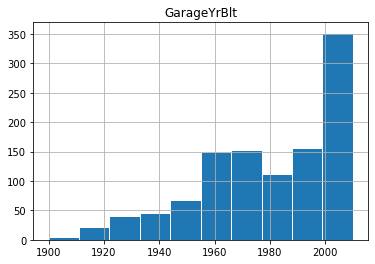

In [41]:
train_data.hist('GarageYrBlt', ec='w')

<AxesSubplot:>

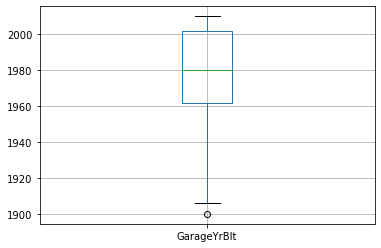

In [42]:
train_data.boxplot('GarageYrBlt')

In [43]:
train_data["GarageYrBlt"].mean(), train_data["GarageYrBlt"].median()

(1978.8090909090909, 1980.0)

array([[<AxesSubplot:title={'center':'GarageYrBlt'}>]], dtype=object)

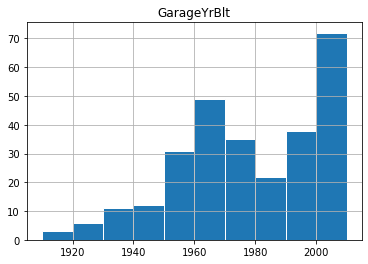

In [44]:
test_data.hist('GarageYrBlt', ec='w')

<AxesSubplot:>

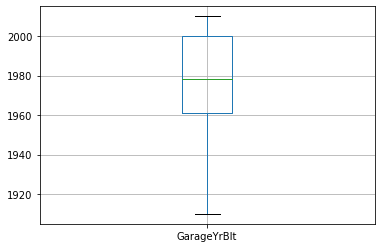

In [45]:
test_data.boxplot('GarageYrBlt')

In [46]:
test_data["GarageYrBlt"].mean(), test_data["GarageYrBlt"].median()

(1977.3118279569892, 1978.0)

In [47]:
#not a significant difference between the mean and median however I much prefer a whole number for the year so I will opt for the median

In [48]:
train_data["GarageYrBlt"]=train_data["GarageYrBlt"].fillna(train_data["GarageYrBlt"].median())

In [49]:
test_data["GarageYrBlt"]=test_data["GarageYrBlt"].fillna(test_data["GarageYrBlt"].median())

In [50]:
final_test_data["GarageYrBlt"]=final_test_data["GarageYrBlt"].fillna(final_test_data["GarageYrBlt"].median())

In [51]:
#Variable 3 - MasVnrArea

Text(0, 0.5, 'Number of observations')

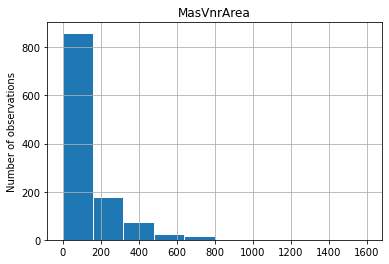

In [52]:
train_data.hist('MasVnrArea', ec='w')
plt.ylabel('Number of observations')

Text(0, 0.5, 'MasVnrArea')

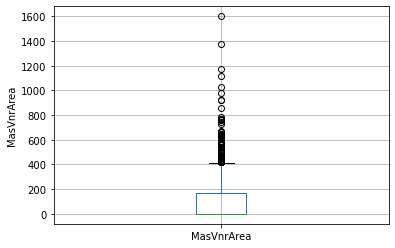

In [53]:
train_data.boxplot('MasVnrArea')
plt.ylabel('MasVnrArea')

In [54]:
train_data["MasVnrArea"].mean(), train_data["MasVnrArea"].median()

(101.93453919035315, 0.0)

In [55]:
#since a lot of 0's in the MasVnrArea, makes sense to let this value = 0 if the column is null. 

In [56]:
train_data["MasVnrArea"]=train_data["MasVnrArea"].fillna(0)
test_data["MasVnrArea"]=test_data["MasVnrArea"].fillna(0)
final_test_data["MasVnrArea"]=final_test_data["MasVnrArea"].fillna(0)

In [57]:
#Variable 5 - Electrical

In [58]:
train_data['Electrical'].describe(), test_data['Electrical'].describe(), final_test_data['Electrical'].describe()

(count      1167
 unique        5
 top       SBrkr
 freq       1067
 Name: Electrical, dtype: object,
 count       292
 unique        3
 top       SBrkr
 freq        267
 Name: Electrical, dtype: object,
 count      1459
 unique        4
 top       SBrkr
 freq       1337
 Name: Electrical, dtype: object)

In [59]:
#The mode is Sbkr with a 91% of values in each data set. Therefore I will replace the null's with the mode

In [60]:
train_data["Electrical"]=train_data["Electrical"].fillna("Sbrkr")
test_data["Electrical"]=test_data["Electrical"].fillna("Sbrkr")
final_test_data["Electrical"]=final_test_data["Electrical"].fillna("Sbrkr")

In [61]:
#Variable 6 - MasVnrType

In [62]:
train_data['MasVnrType'].describe(), test_data['MasVnrType'].describe(), final_test_data['MasVnrType'].describe()

(count     1161
 unique       4
 top       None
 freq       693
 Name: MasVnrType, dtype: object,
 count      291
 unique       4
 top       None
 freq       171
 Name: MasVnrType, dtype: object,
 count     1443
 unique       4
 top       None
 freq       878
 Name: MasVnrType, dtype: object)

In [63]:
#The mode across all three data sets is None corresponding to almost 60% across all three data sets. 
#If a different value, it would have been stated therefore change N/A's to None

In [64]:
train_data["MasVnrType"]=train_data["MasVnrType"].fillna("None")
test_data["MasVnrType"]=test_data["MasVnrType"].fillna("None")
final_test_data["MasVnrType"]=final_test_data["MasVnrType"].fillna("None")

In [65]:
#Calculate the updated missing values remaining

In [66]:
missing_train_updated=train_data.isnull().sum().sort_values(ascending=False)
percent_train_updated=(train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_values=pd.concat([missing_train_updated,percent_train_updated], axis=1, keys=['Total', 'Percent'])
missing_values.head(20)

,Total,Percent
Id,0,0.0
CentralAir,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0


In [67]:
missing_test_updated=test_data.isnull().sum().sort_values(ascending=False)
percent_test_updated=(test_data.isnull().sum()/test_data.isnull().count()).sort_values(ascending=False)
missing_values=pd.concat([missing_test_updated,percent_test_updated], axis=1, keys=['Total', 'Percent'])
missing_values.head(20)

,Total,Percent
Id,0,0.0
CentralAir,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0


In [68]:
missing_finaltest_updated=final_test_data.isnull().sum().sort_values(ascending=False)
percent_finaltest_updated=(final_test_data.isnull().sum()/final_test_data.isnull().count()).sort_values(ascending=False)
missing_values=pd.concat([missing_finaltest_updated,percent_finaltest_updated], axis=1, keys=['Total', 'Percent'])
missing_values.head(20)

,Total,Percent
MSZoning,4,0.002742
BsmtFullBath,2,0.001371
BsmtHalfBath,2,0.001371
Functional,2,0.001371
Utilities,2,0.001371
Exterior2nd,1,0.000685
BsmtFinSF2,1,0.000685
GarageArea,1,0.000685
BsmtFinSF1,1,0.000685
GarageCars,1,0.000685


In [69]:
#Since tiny amounts of Na's remaining in the final test data set, I would simply eliminate from the final test data set. At max 22 values/1476 which is 1.5% of the data set. Kaggle submission purposes will go the extra length to change N/A's

In [70]:
final_test_data["BsmtFinSF2"]=final_test_data["BsmtFinSF2"].fillna(final_test_data["BsmtFinSF2"].median())
final_test_data["GarageArea"]=final_test_data["GarageArea"].fillna(final_test_data["GarageArea"].median())
final_test_data["BsmtFinSF1"]=final_test_data["BsmtFinSF1"].fillna(final_test_data["BsmtFinSF1"].median())
final_test_data["TotalBsmtSF"]=final_test_data["TotalBsmtSF"].fillna(final_test_data["TotalBsmtSF"].median())
final_test_data["BsmtUnfSF"]=final_test_data["BsmtUnfSF"].fillna(final_test_data["BsmtUnfSF"].median())

In [71]:
final_test_data['MSZoning'].describe(), final_test_data['BsmtFullBath'].describe(), final_test_data['BsmtHalfBath'].describe(), final_test_data['Functional'].describe(), final_test_data['Utilities'].describe(), final_test_data['Exterior2nd'].describe(), final_test_data['GarageCars'].describe(), final_test_data['Exterior1st'].describe(), final_test_data['SaleType'].describe(), final_test_data['KitchenQual'].describe()

(count     1455
 unique       5
 top         RL
 freq      1114
 Name: MSZoning, dtype: object,
 count    1457.000000
 mean        0.434454
 std         0.530648
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%         1.000000
 max         3.000000
 Name: BsmtFullBath, dtype: float64,
 count    1457.000000
 mean        0.065202
 std         0.252468
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%         0.000000
 max         2.000000
 Name: BsmtHalfBath, dtype: float64,
 count     1457
 unique       7
 top        Typ
 freq      1357
 Name: Functional, dtype: object,
 count       1457
 unique         1
 top       AllPub
 freq        1457
 Name: Utilities, dtype: object,
 count        1458
 unique         15
 top       VinylSd
 freq          510
 Name: Exterior2nd, dtype: object,
 count    1458.000000
 mean        1.766118
 std         0.775945
 min         0.000000
 25%         1.000000
 50%         2.000000
 75%         2.000000
 max      

In [72]:
final_test_data["MSZoning"]=final_test_data["MSZoning"].fillna("RL")
final_test_data["BsmtFullBath"]=final_test_data["BsmtFullBath"].fillna(0)
final_test_data["BsmtHalfBath"]=final_test_data["BsmtHalfBath"].fillna(0)
final_test_data["Functional"]=final_test_data["Functional"].fillna("Typ")
final_test_data["Utilities"]=final_test_data["Utilities"].fillna("AllPub")
final_test_data["Exterior2nd"]=final_test_data["Exterior2nd"].fillna("VinylSd")
final_test_data["GarageCars"]=final_test_data["GarageCars"].fillna(0)
final_test_data["Exterior1st"]=final_test_data["Exterior1st"].fillna("VinylSd")
final_test_data["SaleType"]=final_test_data["SaleType"].fillna("WD")
final_test_data["KitchenQual"]=final_test_data["KitchenQual"].fillna("TA")

In [73]:
missing_finaltest_updated2=final_test_data.isnull().sum().sort_values(ascending=False)
percent_finaltest_updated2=(final_test_data.isnull().sum()/final_test_data.isnull().count()).sort_values(ascending=False)
missing_values=pd.concat([missing_finaltest_updated2,percent_finaltest_updated2], axis=1, keys=['Total', 'Percent'])
missing_values.head(20)

,Total,Percent
Id,0,0.0
MSSubClass,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0
BedroomAbvGr,0,0.0


In [74]:
#Dealing with Categorical Variables

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [76]:
#label each data set so can combine all into the same data set

In [77]:
train_data.insert(1, "data", "train")
test_data.insert(1, "data", "test")
final_test_data.insert(1, "data", "finaltest")

In [78]:
alldata = [train_data, test_data, final_test_data]
alldata=pd.concat(alldata)

In [79]:
alldata=pd.get_dummies(alldata, columns=['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'MoSold'], drop_first=True)

In [80]:
#remove to previous data sets so don't get confused 
del(train_data, test_data, final_test_data)

In [81]:
train_data=alldata.loc[alldata['data']=='train']

In [82]:
test_data=alldata.loc[alldata['data']=='test']

In [83]:
final_test_data=alldata.loc[alldata['data']=='finaltest']

In [84]:
train_data=train_data.drop(columns='data')
test_data=test_data.drop(columns='data')
final_test_data=final_test_data.drop(columns='data')

In [85]:
#Locate the column number for SalePrice

In [86]:
list(train_data.columns).index('SalePrice')

25

In [87]:
x_train=train_data.iloc[:,np.r_[1:25,26:310]]

In [88]:
y_train=train_data.loc[:,'SalePrice']

In [89]:
list(test_data.columns).index('SalePrice')

25

In [90]:
x_test=test_data.iloc[:,np.r_[1:25,26:310]]

In [91]:
y_test=test_data.loc[:,'SalePrice']

In [92]:
#Linear Regression 
import statsmodels.api as sm

In [93]:
x_train=sm.add_constant(x_train, has_constant='add')

In [94]:
lm1=sm.OLS(y_train,x_train).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     60.32
Date:                Tue, 31 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:48:19   Log-Likelihood:                -13073.
No. Observations:                1168   AIC:                         2.672e+04
Df Residuals:                     882   BIC:                         2.817e+04
Df Model:                         285                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -1.37e+06   7.24e+05     -1.893      0.059   -2.79e+06    5.05e+04
LotFrontage              63.4660     46.451      1.366      0.172     -27.701     154.633
LotArea                   0.8360      0.152      5.485      0.000       0.537       1.135
YearBuilt               484.9493     88.921      5.454      0.000     310.428     659.471
YearRemodAdd             66.3765     60.033      1.106      0.269     -51.448     184.202
MasVnrArea               15.0439      6.148      2.447      0.015       2.977      27.111
BsmtFinSF1               16.7502      3.044      5.503      0.000      10.776      22.725
BsmtFinSF2               15.5507      6.208      2.505      0.012       3.366      27.735
BsmtUnfSF                -3.4663      2.920     -1.187      0.236      -9.198       2.265
TotalBsmtSF              28.8346      4.315      6.682      0.000      20.365      37.304
1stFlrSF                 23.9798      6.651      3.605      0.000      10.926      37.034
2ndFlrSF                 33.1633      5.643      5.877      0.000      22.088      44.238
LowQualFinSF            -31.8659     13.839     -2.303      0.022     -59.026      -4.705
GrLivArea                25.2773      5.977      4.229      0.000      13.546      37.008
TotRmsAbvGrd           1860.7814   1003.524      1.854      0.064    -108.792    3830.355
GarageYrBlt              76.2607     66.399      1.149      0.251     -54.058     206.579
GarageArea               15.6478      8.098      1.932      0.054      -0.245      31.540
WoodDeckSF                8.6874      6.445      1.348      0.178      -3.962      21.337
OpenPorchSF              22.9747     12.315      1.866      0.062      -1.196      47.146
EnclosedPorch             1.9026     13.358      0.142      0.887     -24.315      28.120
3SsnPorch                55.7091     21.291      2.617      0.009      13.922      97.496
ScreenPorch              42.5124     13.034      3.262      0.001      16.931      68.093
PoolArea                623.4819    230.379      2.706      0.007     171.326    1075.638
MiscVal                   2.8901      8.274      0.349      0.727     -13.348      19.128
YrSold                  285.9121    531.514      0.538      0.591    -757.267    1329.091
MSZoning_FV            4.072e+04   1.34e+04      3.038      0.002    1.44e+04     6.7e+04
MSZoning_RH            3.152e+04   1.38e+04      2.283      0.023    4427.001    5.86e+04
MSZoning_RL            3.115e+04    1.2e+04      2.601      0.009    7644.199    5.47e+04
MSZoning_RM             2.91e+04   1.14e+04      2.558      0.011    6769.639    5.14e+04
Street_Pave            1.781e+04   1.32e+04      1.347      0.178   -8146.670    4.38e+04
Alley_None            -3254.3196   4363.628     -0.746      0.456   -1.18e+04    5309.987
Alley_Pave            -

In [95]:
#LM1 Diagnostics

In [96]:
residuals_lm1=lm1.resid

Text(0, 0.5, 'Standardised Residuals')

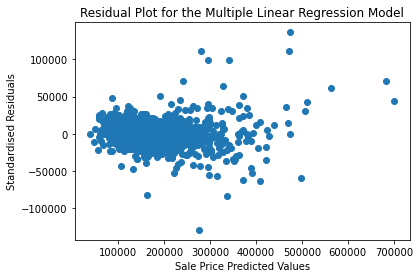

In [97]:
plt.scatter(x=lm1.fittedvalues, y=residuals_lm1)
plt.title ("Residual Plot for the Multiple Linear Regression Model")
plt.xlabel('Sale Price Predicted Values')
plt.ylabel('Standardised Residuals')

Text(0, 0.5, 'Number of Observations')

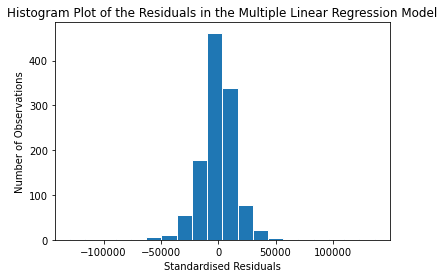

In [98]:
plt.hist(lm1.resid, edgecolor='white', bins=20)
plt.title ("Histogram Plot of the Residuals in the Multiple Linear Regression Model")
plt.xlabel('Standardised Residuals')
plt.ylabel('Number of Observations')

In [99]:
import scipy.stats as stats

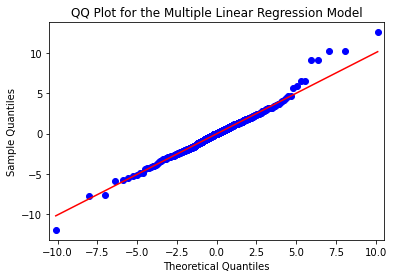

In [101]:
sm.qqplot(lm1.resid, stats.t, fit=True, line="q")
plt.title ("QQ Plot for the Multiple Linear Regression Model")
plt.show()

In [105]:
x_test=sm.add_constant(x_test, has_constant='add')

In [106]:
lm1_predict=lm1.predict(x_test)

In [107]:
from sklearn.metrics import mean_squared_error
import math

In [108]:
mse1=mean_squared_error(y_test, lm1_predict)

In [109]:
rmse1=math.sqrt(mse1)

In [110]:
rmse1

66075.934700883

In [111]:
#Log Linear Regression Model

In [112]:
log_y_train=np.log(y_train)

Text(0, 0.5, 'Number of observations')

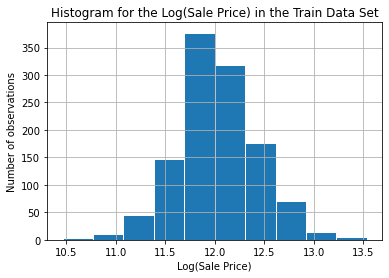

In [113]:
np.log(y_train).hist(ec='w')
plt.title('Histogram for the Log(Sale Price) in the Train Data Set')
plt.xlabel('Log(Sale Price)')
plt.ylabel('Number of observations')

In [114]:
lm2=sm.OLS(log_y_train,x_train).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     68.71
Date:                Mon, 30 Aug 2021   Prob (F-statistic):               0.00
Time:                        19:13:49   Log-Likelihood:                 1257.3
No. Observations:                1168   AIC:                            -1943.
Df Residuals:                     882   BIC:                            -494.6
Df Model:                         285                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.5745      3.398      1.935      0.053      -0.094      13.243
LotFrontage               0.0003      0.000      1.469      0.142      -0.000       0.001
LotArea                4.142e-06   7.15e-07      5.790      0.000    2.74e-06    5.55e-06
YearBuilt                 0.0023      0.000      5.404      0.000       0.001       0.003
YearRemodAdd              0.0007      0.000      2.388      0.017       0.000       0.001
MasVnrArea             -1.43e-05   2.89e-05     -0.496      0.620   -7.09e-05    4.23e-05
BsmtFinSF1             5.638e-05   1.43e-05      3.946      0.000    2.83e-05    8.44e-05
BsmtFinSF2             5.396e-05   2.91e-05      1.852      0.064   -3.23e-06       0.000
BsmtUnfSF              2.084e-06   1.37e-05      0.152      0.879   -2.48e-05     2.9e-05
TotalBsmtSF               0.0001   2.03e-05      5.551      0.000    7.27e-05       0.000
1stFlrSF               7.547e-05   3.12e-05      2.418      0.016    1.42e-05       0.000
2ndFlrSF                  0.0001   2.65e-05      4.284      0.000    6.15e-05       0.000
LowQualFinSF          -2.456e-05    6.5e-05     -0.378      0.705      -0.000       0.000
GrLivArea                 0.0002   2.81e-05      5.859      0.000       0.000       0.000
TotRmsAbvGrd              0.0036      0.005      0.761      0.447      -0.006       0.013
GarageYrBlt            6.604e-05      0.000      0.212      0.832      -0.001       0.001
GarageArea                0.0001    3.8e-05      3.005      0.003    3.96e-05       0.000
WoodDeckSF             9.179e-05   3.02e-05      3.034      0.002    3.24e-05       0.000
OpenPorchSF            5.368e-05   5.78e-05      0.929      0.353   -5.98e-05       0.000
EnclosedPorch          9.531e-05   6.27e-05      1.520      0.129   -2.77e-05       0.000
3SsnPorch                 0.0002   9.99e-05      2.055      0.040    9.26e-06       0.000
ScreenPorch               0.0002   6.12e-05      3.984      0.000       0.000       0.000
PoolArea                  0.0017      0.001      1.534      0.125      -0.000       0.004
MiscVal                4.191e-05   3.88e-05      1.079      0.281   -3.43e-05       0.000
YrSold                   -0.0036      0.002     -1.443      0.149      -0.008       0.001
MSZoning_FV               0.4149      0.063      6.594      0.000       0.291       0.538
MSZoning_RH               0.3506      0.065      5.412      0.000       0.223       0.478
MSZoning_RL               0.3634      0.056      6.463      0.000       0.253       0.474
MSZoning_RM               0.3293      0.053      6.167      0.000       0.225       0.434
Street_Pave               0.0874      0.062      1.407      0.160      -0.034       0.209
Alley_None               -0.0201      0.020     -0.981      0.327      -0.060       0.020
Alley_Pave             

In [115]:
residuals_lm2 = lm2.resid

Text(0, 0.5, 'Standardised Residuals')

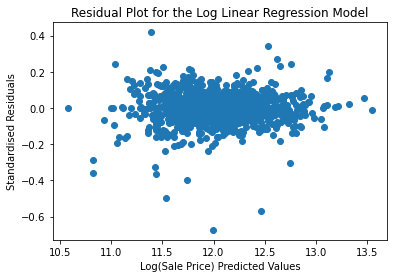

In [155]:
plt.scatter(x=lm2.fittedvalues, y=residuals_lm2)
plt.title ("Residual Plot for the Log Linear Regression Model")
plt.xlabel('Log(Sale Price) Predicted Values')
plt.ylabel('Standardised Residuals')

Text(0, 0.5, 'Number of Observations')

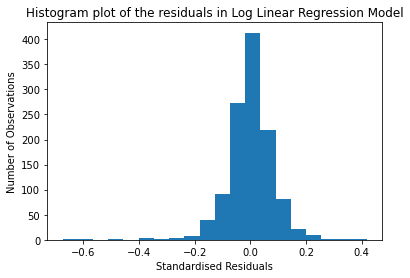

In [141]:
plt.hist(residuals_lm2, bins=20)
plt.title ("Histogram plot of the residuals in Log Linear Regression Model")
plt.xlabel('Standardised Residuals')
plt.ylabel('Number of Observations')

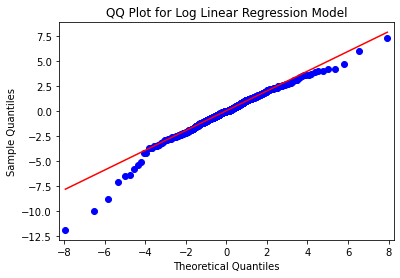

In [142]:
sm.qqplot(lm2.resid, stats.t, fit=True, line="q")
plt.title ("QQ Plot for Log Linear Regression Model")
plt.show()

In [117]:
lm2_predict=lm2.predict(x_test)

In [118]:
log_y_test=np.log(y_test)

In [119]:
mse2=mean_squared_error(log_y_test, lm2_predict)

In [120]:
rmse2=math.sqrt(mse2)

In [121]:
rmse2

0.22396650942751256

In [122]:
#Random Forest Model 
from sklearn.ensemble import RandomForestRegressor

In [123]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=1)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [124]:
rf_pred = rf_model.predict(x_test)

In [125]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':rf_pred})
df

,Actual,Predicted
0,129900.0,137349.10
1,117000.0,119493.84
2,125500.0,113519.50
3,141000.0,103381.66
4,160000.0,356051.80
...,...,...
287,275000.0,274408.23
288,106500.0,103882.33
289,107500.0,111522.16
290,99900.0,87022.00


In [126]:
mse3=mean_squared_error(y_test, rf_pred)

In [127]:
rmse3=math.sqrt(mse3)
rmse3

30995.047094286852

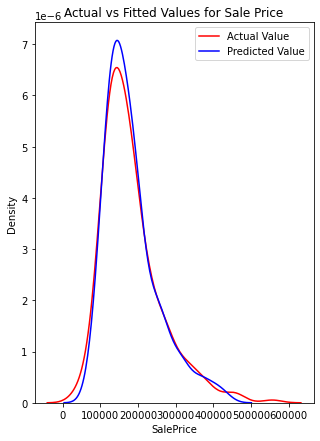

In [128]:
#Actual vs Predicted Values for Random Forest Model

plt.figure(figsize=(5,7))

fig=sns.kdeplot(y_test, color="r", label="Actual Value")
fig=sns.kdeplot(rf_pred, color="b", label="Predicted Value")

fig.legend()
plt.title ("Actual vs Fitted Values for Sale Price")
plt.show()


In [129]:
rf_resid=y_test - rf_model.predict(x_test)

Text(0, 0.5, 'Standardised Residuals')

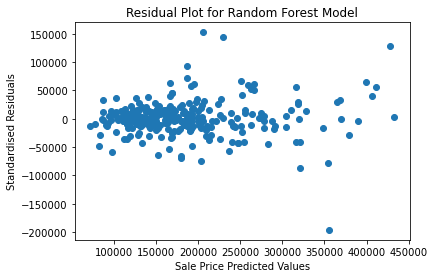

In [143]:
plt.scatter(x=rf_pred, y=rf_resid)
plt.title ("Residual Plot for Random Forest Model")
plt.xlabel('Sale Price Predicted Values')
plt.ylabel('Standardised Residuals')

Text(0, 0.5, 'Number of Observations')

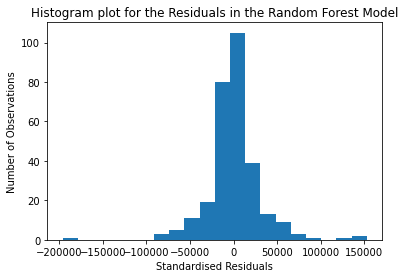

In [150]:
plt.hist(rf_resid, bins=20)
plt.title ("Histogram plot for the Residuals in the Random Forest Model")
plt.xlabel('Standardised Residuals')
plt.ylabel('Number of Observations')

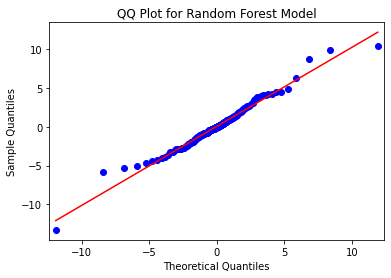

In [146]:
sm.qqplot(rf_resid, stats.t, fit=True, line="q")
plt.title ("QQ Plot for Random Forest Model")
plt.show()

In [140]:
from sklearn.metrics import r2_score
rf_r2 = r2_score(y_test, rf_pred)
rf_r2

0.8457966813936713

In [141]:
#adjusted r2
adj_r2=1-(1-rf_r2)*((len(rf_pred)-1)/(len(rf_pred)-99))
adj_r2

0.7674965507023748

In [142]:
#Correlation with feature selection

In [143]:
correlation_example=x_train.iloc[:,1:8]

In [144]:
correlation_example

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2
0,60.0,7200,1920,1950,0.0,0.0,0.0
1,69.0,11250,1977,1977,0.0,767.0,0.0
2,21.0,1533,1970,2008,0.0,0.0,0.0
3,80.0,8892,1960,1960,66.0,0.0,0.0
4,69.0,11000,2000,2000,72.0,0.0,0.0
...,...,...,...,...,...,...,...
1163,80.0,8800,1964,1964,425.0,553.0,0.0
1164,70.0,8294,1971,1971,0.0,0.0,0.0
1165,69.0,9819,1977,1977,0.0,1567.0,0.0
1166,69.0,10900,1977,1977,153.0,378.0,0.0


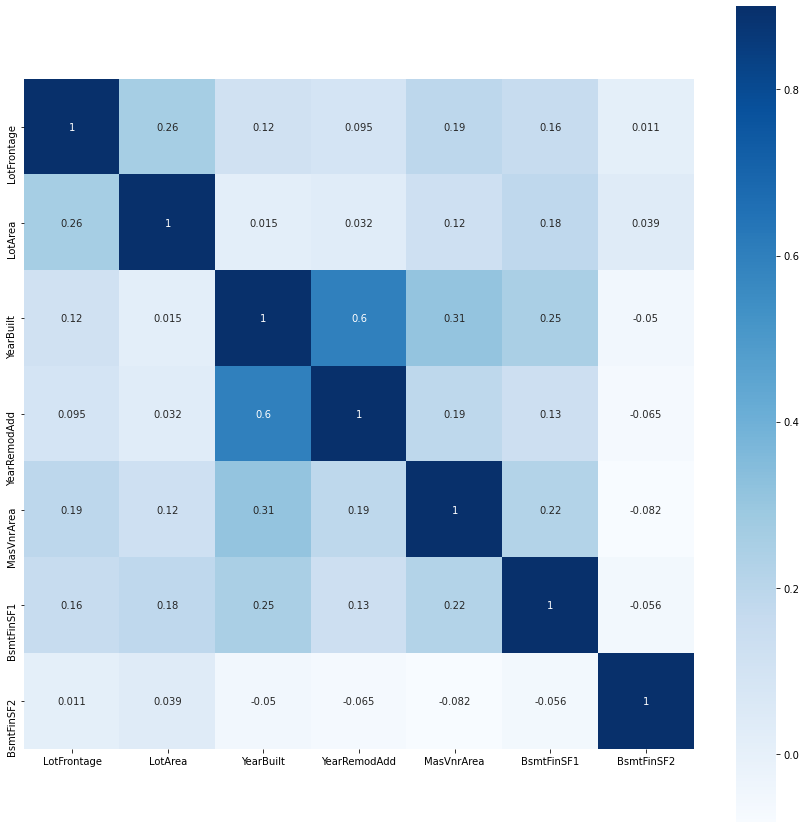

In [145]:
correlation_matrix=correlation_example.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, vmax=0.9, square=True, cmap='Blues')
plt.savefig('correlation_matrix.png')
plt.show()

In [146]:
#Correlation for the whole data set

In [147]:
def correlation(dataset, threshold):
    col_corr=set()
    correlation_matrix = dataset.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if (correlation_matrix.iloc[i,j]) > threshold:
                colname=correlation_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [148]:
correlation_xtrain = x_train
correlation_xtest = x_test

In [149]:
corr_features = correlation(correlation_xtrain, 0.8)
len(set(corr_features))

21

In [150]:
corr_features

{'1stFlrSF',
 'BsmtCond_None',
 'BsmtExposure_None',
 'BsmtFinType1_None',
 'BsmtFinType2_None',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'GarageCond_None',
 'GarageFinish_None',
 'GarageQual_None',
 'HouseStyle_2Story',
 'MSSubClass_190',
 'MSSubClass_45',
 'MSSubClass_80',
 'MSSubClass_90',
 'Neighborhood_Somerst',
 'SaleCondition_Partial',
 'TotRmsAbvGrd'}

In [151]:
correlation_xtrain=correlation_xtrain.drop(corr_features, axis=1)
correlation_xtest=correlation_xtest.drop(corr_features, axis=1)

In [152]:
#Log Linear Regression Model after Correlation Removal

In [153]:
lm4 =sm.OLS(log_y_train, correlation_xtrain).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     71.77
Date:                Wed, 25 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:57:49   Log-Likelihood:                 1247.4
No. Observations:                1168   AIC:                            -1949.
Df Residuals:                     895   BIC:                            -566.5
Df Model:                         272                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.8682      3.386      2.029      0.043       0.223      13.513
LotFrontage               0.0004      0.000      1.852      0.064   -2.38e-05       0.001
LotArea                 3.47e-06   6.83e-07      5.078      0.000    2.13e-06    4.81e-06
YearBuilt                 0.0022      0.000      5.453      0.000       0.001       0.003
YearRemodAdd              0.0007      0.000      2.352      0.019       0.000       0.001
MasVnrArea            -1.563e-05   2.84e-05     -0.550      0.582   -7.14e-05    4.01e-05
BsmtFinSF1             5.371e-05   1.42e-05      3.771      0.000    2.58e-05    8.17e-05
BsmtFinSF2             5.377e-05    2.9e-05      1.856      0.064   -3.08e-06       0.000
BsmtUnfSF              3.781e-06   1.37e-05      0.277      0.782    -2.3e-05    3.06e-05
TotalBsmtSF               0.0001      2e-05      5.568      0.000     7.2e-05       0.000
2ndFlrSF               4.037e-05   3.65e-05      1.107      0.269   -3.12e-05       0.000
LowQualFinSF          -9.737e-05    9.1e-05     -1.071      0.285      -0.000    8.11e-05
GrLivArea                 0.0002   2.58e-05      9.657      0.000       0.000       0.000
GarageYrBlt            4.965e-05      0.000      0.161      0.873      -0.001       0.001
GarageArea                0.0001   3.78e-05      2.947      0.003    3.72e-05       0.000
WoodDeckSF             9.163e-05   3.02e-05      3.036      0.002    3.24e-05       0.000
OpenPorchSF            6.618e-05   5.73e-05      1.155      0.249   -4.63e-05       0.000
EnclosedPorch             0.0001   6.22e-05      1.735      0.083   -1.42e-05       0.000
3SsnPorch                 0.0002   9.98e-05      1.925      0.055   -3.78e-06       0.000
ScreenPorch               0.0003   6.09e-05      4.123      0.000       0.000       0.000
PoolArea                  0.0014      0.001      1.280      0.201      -0.001       0.003
MiscVal                4.319e-05   3.87e-05      1.117      0.264   -3.27e-05       0.000
YrSold                   -0.0037      0.002     -1.493      0.136      -0.009       0.001
MSZoning_FV               0.4270      0.061      6.945      0.000       0.306       0.548
MSZoning_RH               0.3620      0.064      5.635      0.000       0.236       0.488
MSZoning_RL               0.3703      0.056      6.632      0.000       0.261       0.480
MSZoning_RM               0.3326      0.053      6.264      0.000       0.228       0.437
Street_Pave               0.0615      0.060      1.026      0.305      -0.056       0.179
Alley_None               -0.0178      0.020     -0.878      0.380      -0.058       0.022
Alley_Pave                0.0218      0.030      0.724      0.469      -0.037       0.081
LotShape_IR2              0.0228      0.020      1.125      0.261      -0.017       0.063
LotShape_IR3           

In [154]:
residuals_lm4 = lm4.resid

Text(0.5, 1.0, 'Residual Plot for LM4')

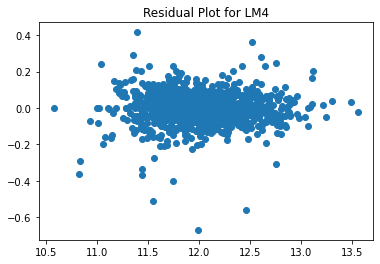

In [155]:
plt.scatter(x=lm4.fittedvalues, y=residuals_lm4)
plt.title ("Residual Plot for LM4")

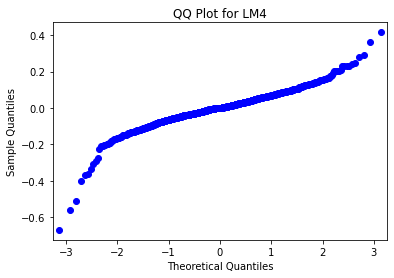

In [156]:
sm.qqplot(lm4.resid)
plt.title ("QQ Plot for LM4")
plt.show()

In [157]:
lm4_predict=lm4.predict(correlation_xtest)

In [158]:
mse4=mean_squared_error(log_y_test, lm4_predict)

In [159]:
rmse4=math.sqrt(mse4)
rmse4

0.2218977547097305

In [160]:
#Kaggle Submission on Final Test Data using LM2 - Log Linear Regresssion Model

In [161]:
x_final_test=final_test_data.iloc[:,np.r_[1:25,26:310]]

In [162]:
x_final_test=sm.add_constant(x_final_test, has_constant='add')

In [163]:
log_predictions=lm2.predict(x_final_test)

In [ ]:
#need to take the exponential to revert the log price back to standard sale price units

In [168]:
log_predictions

0       11.693851
1       11.926972
2       12.136958
3       12.221637
4       12.155807
          ...    
1454    11.351031
1455    11.289245
1456    12.063438
1457    11.684856
1458    12.271507
Length: 1459, dtype: float64

In [169]:
sale_predictions=np.exp(log_predictions)

In [172]:
output = pd.DataFrame({'Id': final_test_data.Id, 'SalePrice': sale_predictions})
output.to_csv('submission.csv', index=False)

In [ ]:
#Kaggle Submission on Final Test Data using LM4 - Log Linear Regresssion Model with feature selection

In [174]:
x_final_test_correlation=x_final_test

In [175]:
x_final_test_correlation=x_final_test_correlation.drop(corr_features, axis=1)

In [176]:
log_predictions2=lm4.predict(x_final_test_correlation)

In [177]:
sale_predictions2=np.exp(log_predictions2)

In [180]:
output = pd.DataFrame({'Id': final_test_data.Id, 'SalePrice': sale_predictions2})
output.to_csv('submission2.csv', index=False)